## Importing Libraries

In [43]:
pip install yellowbrick

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install ydata-profiling --silent


Usage:   
  /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install [options] [-e] <vcs project url> ...
  /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install [options] [-e] <local project path> ...
  /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install [options] <archive url/path> ...

no such option: --silent
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings
from yellowbrick.regressor import PredictionError
from yellowbrick.style import set_palette



%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas_profiling import ProfileReport


class clr:
    start = '\033[91m'+'\033[1m'
    clr = '\033[91m'
    end = '\033[0m'

## Loading Dataset and getting info

In [5]:
df = pd.read_csv("Weather.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

## Checking columns with high null values 

In [7]:
df_null = df.isnull().sum()
df_null = pd.DataFrame({'Column Name':df_null.index, 'Total':df_null.values})
df_null.value_counts()

Column Name  Total 
DA           0         1
PoorWeather  84803     1
WindGustSpd  118508    1
WTE          119040    1
TSHDSBRSGF   84803     1
Snowfall     1163      1
STA          0         1
SPD          118508    1
SNF          1163      1
SND          113477    1
SD3          119040    1
RVG          119040    1
RHX          119040    1
RHN          119040    1
Precip       0         1
PRCP         1932      1
DR           118507    1
PGT          118515    1
MinTemp      0         1
MeanTemp     0         1
MaxTemp      0         1
MO           0         1
MIN          468       1
MEA          498       1
MAX          474       1
ITH          119040    1
FTI          119040    1
FT           119040    1
FB           119040    1
Date         0         1
YR           0         1
dtype: int64

### New df

In [8]:
df = df[['MaxTemp', 'MinTemp']]
df

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667
...,...,...
119035,28.333333,18.333333
119036,29.444444,18.333333
119037,28.333333,18.333333
119038,28.333333,18.333333


### Data Exploration

- Dataset Report 

In [9]:
ProfileReport(df, title='WW2 Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}}, html={'style':{'primary_color': '#45658F'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

<AxesSubplot: xlabel='MinTemp', ylabel='MaxTemp'>

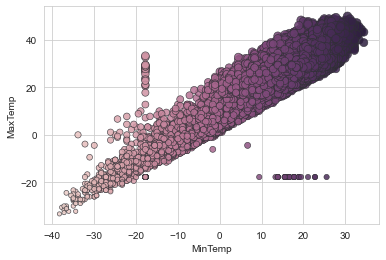

In [16]:
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', alpha=0.85, size='MaxTemp',
                hue='MinTemp', legend=False, linewidth=0.65, edgecolor='#303035')

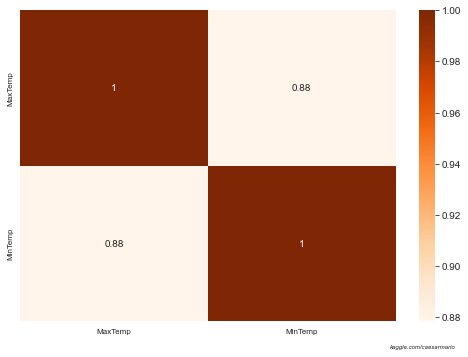

In [17]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gcf().text(0.78, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=6)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])


## Data Preprocessing

In [18]:
X = df['MinTemp']
y = df['MaxTemp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [54]:
# --- Actual vs. Prediction Data Frame ---
df_pred = pd.DataFrame({'Actual Temp.': y_test, 'Predicted Temp.': y_pred})
df_pred_sample = df_pred.head(15).round(2)
df_pred_index = df_pred_sample.index.astype(str)


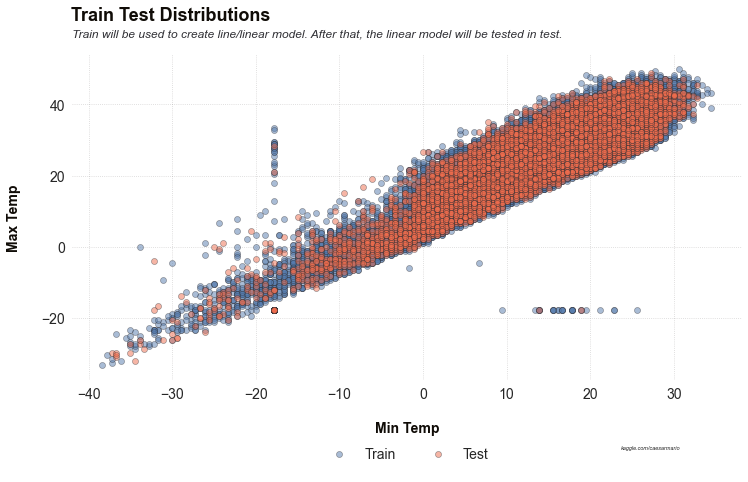

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training Data', color='#557BAD', alpha=0.5, linewidth=0.65, edgecolor='#303035')
plt.scatter(X_test, y_test, label='Testing Data', color='#EE6C4D', alpha=0.5, linewidth=0.65, edgecolor='#303035')
plt.suptitle('Train Test Distributions', fontweight='heavy', x=0.124, y=0.99, ha='left', fontsize=18, color='#100C07')
plt.title('Train will be used to create line/linear model. After that, the linear model will be tested in test.\n', style='italic', fontsize=12, loc='left', color='#303035')
plt.xlabel('\nMin Temp', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
plt.ylabel('Max Temp\n', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', which='major', alpha=0.3, color='#6D6A6A', linestyle='dotted', zorder=1)
plt.grid(axis='x', which='major', alpha=0.3, color='#6D6A6A', linestyle='dotted', zorder=1)
plt.legend(['Train', 'Test'], fontsize=14, loc='upper center', frameon=False, ncol=2, borderpad=1, bbox_to_anchor=(0.5, -0.14))
plt.gcf().text(0.76, -0.035, 'kaggle.com/caesarmario', style='italic', fontsize=5.5)
ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color('None')
plt.show();

## Linear Regression Theory

- <b>What is Linear Regression? </b><br>
The supervised machine learning approach known as "linear regression" identifies the linear connection between the dependent and independent variables by determining which linear line between the independent and dependent variables fits the data the best. The primary goal of a linear regression model is to identify the best-fitting linear line and the ideal intercept and coefficient values that minimize error. The objective is to lessen this disparity, which represents the gap between the actual value and the predicted value.

Formula:
𝑦=𝑏𝑜+𝑏1𝑥
 
with:
𝑥
  = independent variable
𝑦
  = dependent variable
𝑏𝑜
  = intercept
𝑏1
  = coefficient or slope
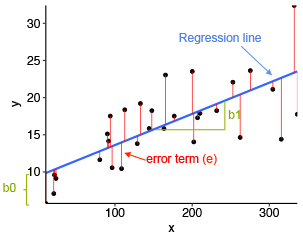


- <b>Linear Regression Assumptions </b> <br>
<b>Linearity</b> : The dependent variable  𝑦
  should have a linear relationship with the independent variables. A scatter plot between the two variables will help to assure this assumption. <br>
<b>Normality</b> : Both the  𝑥
  and  𝑦
  variables should to follow a normal distribution. <br>
<b>Homoscedasticity</b> : The spread of the residuals, or the variance of the error terms, ought to be constant for all values of  𝑥.<br>
<b>Independence/No Multicollinearity</b> : There should be no connection between the variables, which means that they should be independent of one another.
The error terms should be normally distributed <br>
    <b>No Autocorrelation</b> : It is recommended that the error terms remain independent. Using the Durbin-Watson test, autocorrelation can be evaluated.

- <b>Linear Regression Evaluation Metrics</b> <br>
In regression analysis, there are some metrics to evaluate the performance of the model. Those metrics are:
R Squared or Coefficient of Determination -- Interpreted as how well the regression model explains observed data, <br>
<b>Mean Absolute Error (MAE)</b> -- Lower values indicates better model,<br>
<b>Mean Squared Error (MSE)</b> -- Better model is indicated by lower values,<br>
<b>Root Mean Squared Error (RMSE) </b> -- Lower values indicates better model.

## Implementation

In [27]:
#Defining Shuffle Split
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)

# Setting and fitting the model
lr = LinearRegression()
model_LR = lr.fit(X_train.values.reshape(-1, 1), y_train)

# --- Applying Cross Validation w/ Shuffle Split ---
cv_score = cross_val_score(lr, X_train.values.reshape(-1, 1), y_train, cv=cv, n_jobs=-1)

# --- Perform Prediction ---
y_pred = cross_val_predict(model_LR, X_test.values.reshape(-1, 1), y_test, cv=10)

In [31]:
# --- Cross Validation Scores --- 
print(clr.start+'.: Cross Validation Result :.'+clr.end)
print(clr.clr+'*'*30+clr.end)
print(f'\t>> Average Score: '+clr.start+'{:.4f}'.format(cv_score.mean())+clr.end)
print(f'\t>> Standard Deviation: '+clr.start+'{:.4f}'.format(cv_score.std())+clr.end)

# --- LR Metrics ---
print('\n'+clr.start+'.: Evaluation Metrics :.'+clr.end)
print(clr.clr+'*'*25+clr.end)
print(f'\t>> MAE: '+clr.start+'{:.6f}'.format(metrics.mean_absolute_error(y_test, y_pred))+clr.end)
print(f'\t>> MSE: '+clr.start+'{:.6f}'.format(metrics.mean_squared_error(y_test, y_pred))+clr.end)
print(f'\t>> RMSE: '+clr.start+'{:.6f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))+clr.end)
print(f'\t>> R Squared: '+clr.start+'{:.6f}'.format(metrics.r2_score(y_test, y_pred))+clr.end)

# --- Intercept and Coefficients ---
print('\n'+clr.start+'.: Intercept & Coefficients :.'+clr.end)
print(clr.clr+'*'*31+clr.end)
print(f'\t>> Intercept (b0): '+clr.start+'{:.4f}'.format(model_LR.intercept_)+clr.end)
print(f'\t>> Coefficients (b1): '+clr.start+'{:.4f}'.format(model_LR.coef_[0])+clr.end)

.: Cross Validation Result :.
******************************
	>> Average Score: 0.7710
	>> Standard Deviation: 0.0031

.: Evaluation Metrics :.
*************************
	>> MAE: 3.161868
	>> MSE: 16.845124
	>> RMSE: 4.104281
	>> R Squared: 0.770723

.: Intercept & Coefficients :.
*******************************
	>> Intercept (b0): 10.6635
	>> Coefficients (b1): 0.9205


- Based on the intercept and coefficients result, the linear regression formula will be: <br>
 <b>𝑦=10.6635+0.9205x </b> <br>
 with:
 𝑥= independent variable (MinTemp) <br>
 𝑦= dependent variable (MaxTemp)

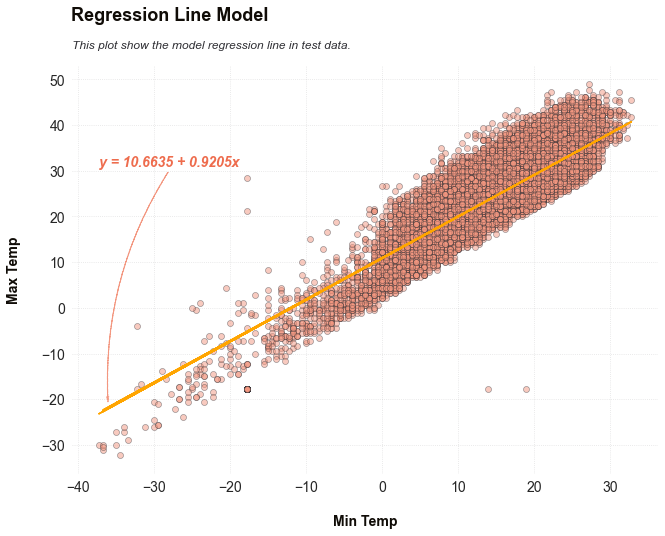

In [38]:
# --- Arrow Settings ---
style = 'Simple, tail_width=0.2, head_width=2, head_length=5'
kw = dict(arrowstyle=style, color='#F39780')
arrow = patches.FancyArrowPatch((-28, 30), (-36, -21), ls='dashed', connectionstyle='arc3, rad=0.16', **kw)

# --- Model Regression Line ---
plt.figure(figsize=(10.5, 7.5))
plt.scatter(X_test, y_test, label='Actual Data', color='#F39780', alpha=0.5, linewidth=0.65, edgecolor='#303035')
plt.plot(X_test, y_pred, label='Regression Line', color='orange')
plt.suptitle('Regression Line Model', fontweight='heavy', x=0.124, y=0.99, ha='left', fontsize=18, color='#100C07')
plt.title('This plot show the model regression line in test data.\n', style='italic', fontsize=12, loc='left', color='#303035')
plt.xlabel('\nMin Temp', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
plt.ylabel('Max Temp\n', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', which='major', alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
plt.grid(axis='x', which='major', alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
plt.gca().add_patch(arrow)
plt.text(x=-28, y=31, s='y = 10.6635 + 0.9205x', color='#EE6C4D', size=14, weight='bold', style='italic', ha='center')

ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color('None')
plt.show();

## Linear Regression Assumptions

### Linearity Assumption

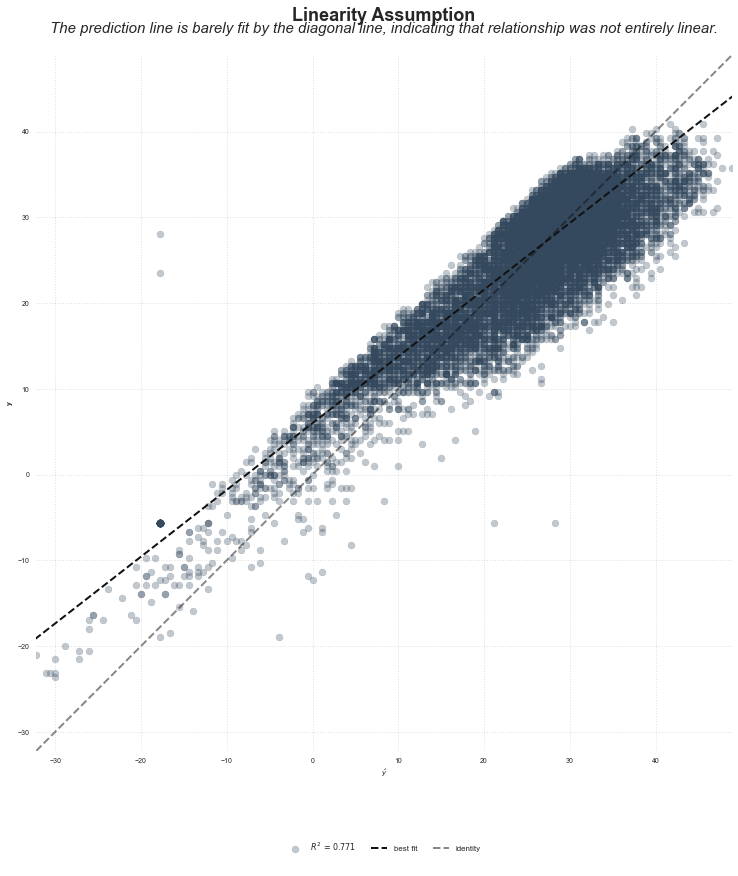

.: Linearity Assumption :.
***************************
- The Residuals are not linearly distributed, since the p-value is 0.00.

.:. The assumption not satisfied .:.
>> Advised to perform non-linear transformations or add polynomial terms to some predictorson variables. <<



In [67]:
# --- Figures Settings ---
set_palette('flatui')
title=dict(fontsize=15, style='italic')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontsize=7, fontweight='bold')

# --- Plot Prediction Error ---
fig, ax = plt.subplots(figsize = (14, 12))
pred_error = PredictionError(model_LR, alpha=0.3)
pred_error.fit(X_train.values.reshape(-1, 1), y_train)
pred_error.score(X_test.values.reshape(-1, 1), y_test)
pred_error.finalize()
pred_error.ax.set_title('The prediction line is barely fit by the diagonal line, indicating that relationship was not entirely linear.\n', **title)
pred_error.ax.tick_params(labelsize=7)
pred_error.ax.set_xlabel(xlabel=r'$\^y$', **xy_label)
pred_error.ax.set_ylabel(ylabel='y', **xy_label)
pred_error.ax.grid(axis='y', **grid_style)
pred_error.ax.grid(axis='x', **grid_style)
for text in pred_error.ax.legend_.texts:
     text.set_fontsize(6)
for spine in pred_error.ax.spines.values():
    spine.set_color('None')
pred_error.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), borderpad=2, ncol=3, frameon=False, fontsize=8)
pred_error.fig.tight_layout()
pred_error.fig.show()
plt.suptitle('Linearity Assumption', fontsize=18, fontweight='bold', y=1.005, ha='center')
plt.show();

# --- If-else Function ---
print(clr.start+'.: Linearity Assumption :.'+clr.end)
print(clr.clr+'*'*27+clr.end)
if p_value < p_value_thresh:
    print('- The Residuals are '+clr.start+'not linearly distributed'+clr.end+', since the p-value is '+clr.start+'{:.2f}'.format(p_value)+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption not satisfied'+clr.end+' .:.')
    print('>> Advised to perform'+clr.start+' non-linear transformations or add polynomial terms to some predictors'+clr.end+'on variables. <<\n')
else:
    print('- The Residuals are '+clr.start+'linearly distributed'+clr.end+', since the p-value is '+clr.start+'{:.2f}'.format(p_value)+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption satisfied'+clr.end+' .:.\n')

### Normality Assumption

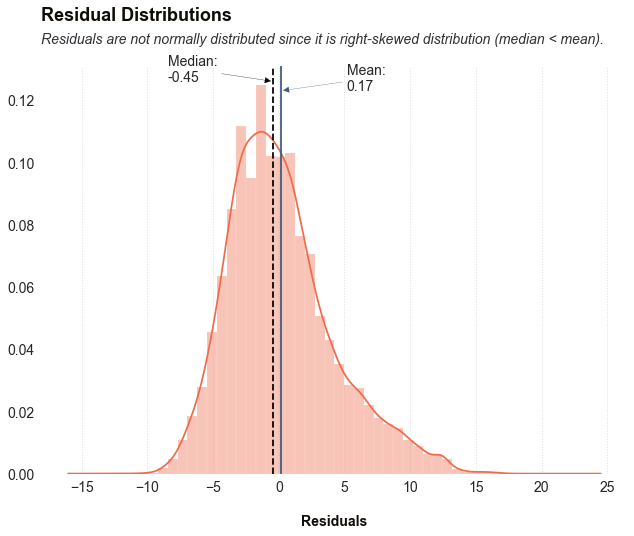

.: Normality Assumption :.
***************************
- The Residuals are not normally distributed, since the p-value is 0.00.

.:. The assumption not satisfied .:.
>> Advised to perform non-linear transformations on variables. <<



In [66]:
# --- Calculating Residuals & Others ---
p_value_thresh=0.05
df_pred['Residuals'] = abs(df_pred['Actual Temp.']) - abs(df_pred['Predicted Temp.'])
p_value = normal_ad(df_pred['Residuals'])[1]
resd_mean = df_pred.Residuals.mean()
resd_median = df_pred.Residuals.median()

    
# --- Plot Residual Distributions ---
plt.figure(figsize=(10.5, 7.5))
sns.distplot(df_pred['Residuals'], color='#EE6C4D')
plt.suptitle('Residual Distributions', fontweight='heavy', x=0.124, y=0.99, ha='left', fontsize=18, color='#100C07')
plt.title('Residuals are not normally distributed since it is right-skewed distribution (median < mean).\n', style='italic', fontsize=14, loc='left', color='#303035')
plt.xlabel('\nResiduals', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
plt.ylabel('')
plt.axvline(x=resd_mean, color='#3D5A80')
plt.axvline(x=resd_median, linestyle='--', color='black')
plt.annotate("Mean:\n{:.2f}".format(resd_mean), fontsize=14, xy=(resd_mean, 0.123), xytext=(resd_mean+5, 0.123), arrowprops={"arrowstyle":"-|>", "color":"#3D5A80"})
plt.annotate("Median:\n{:.2f}".format(resd_median), fontsize=14, xy=(resd_median, 0.126), xytext=(resd_median-8, 0.126), arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', which='major', alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
plt.grid(axis='y', alpha=0, zorder=2)
ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color('None')
plt.show();


# --- If-else Function ---
print(clr.start+'.: Normality Assumption :.'+clr.end)
print(clr.clr+'*'*27+clr.end)
if p_value < p_value_thresh:
    print('- The Residuals are '+clr.start+'not normally distributed'+clr.end+', since the p-value is '+clr.start+'{:.2f}'.format(p_value)+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption not satisfied'+clr.end+' .:.')
    print('>> Advised to perform'+clr.start+' non-linear transformations '+clr.end+'on variables. <<\n')
else:
    print('- The Residuals are '+clr.start+'normally distributed'+clr.end+', since the p-value is '+clr.start+'{:.2f}'.format(p_value)+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption satisfied'+clr.end+' .:.\n')

### Multicollinearity Assumption

In [68]:
# --- Multicolinearity Test ---
print(clr.start+'.: Multicolinearity Assumption :.'+clr.end)
print(clr.clr+'*'*34+clr.end)
df_X = pd.DataFrame({'X':X.values})
df_X.corr().style.background_gradient(cmap='Oranges_r')

.: Multicolinearity Assumption :.
**********************************


,X
X,1.000000


Multicollinearity occurs since the observation data only contains two columns. <br>
However, if multicollinearity happens in more than 2 columns data, this problem can be fixed by removing other predictors with a high variance inflation factor (VIF) or performing dimensionality reduction. <br>
 <b>. : . Multicollinearity assumption not satisfied . : .</b>

### Autocorrelation Assumption

The autocorrelation test will be used Durbin-Watson test to determine whether a positive or negative correlation is present. The following is the hypothesis of the Durbin-Watson test. <br>
<b>H0:</b> There is little/no autocorrelation detected. <br>
<b>H1: </b>There is positive/negative autocorrelation detected.<br>
<b>Criteria:</b><br>
If the Durbin-Watson test value is between 1.5 and 2.5, accept H0.


In [69]:
# --- Durbin-Watson Test --- 
print(clr.start+'.: Durbin-Watson Test :.'+clr.end)
print(clr.clr+'*'*25+clr.end)
durbinWatson = durbin_watson(df_pred['Residuals'])
print(f'>> Result: '+clr.start+'{:.4f}'.format(durbinWatson)+clr.end)

# --- If-else Function ---
if durbinWatson < 1.5:
    print('- It can be concluded that'+clr.start+' there is positive autocorrleation'+clr.end+', since'+clr.start+' the value of Durbin-Watson test is < 1.5'+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption not satisfied'+clr.end+' .:.')
elif durbinWatson > 2.5:
    print('- It can be concluded that'+clr.start+' there is negative autocorrleation'+clr.end+', since'+clr.start+' the value of Durbin-Watson test is > 2.5'+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption not satisfied'+clr.end+' .:.')
else:
    print('- It can be concluded that'+clr.start+' there is little to no autocorrelation'+clr.end+', since'+clr.start+' the value of Durbin-Watson test is between 1.5 and 2.5'+clr.end+'.')
    print('\n.:. The '+clr.start+'assumption satisfied'+clr.end+' .:.')

.: Durbin-Watson Test :.
*************************
>> Result: 1.9902
- It can be concluded that there is little to no autocorrelation, since the value of Durbin-Watson test is between 1.5 and 2.5.

.:. The assumption satisfied .:.
